In [1]:
import numpy as np
import matplotlib.pyplot as plt

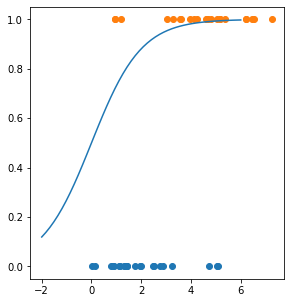

In [2]:
logistic = lambda x: 1/(1+np.exp(-x))


np.random.seed(0)
N = 20
x1 = np.random.randn(N) + 1
x1 = np.concatenate((x1, 0.1*np.random.randn(3)+5))
x2 = np.random.randn(N) + 5
x2 = np.concatenate((x2, 0.1*np.random.randn(3)+1))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(x1, np.zeros(x1.size))
plt.scatter(x2, np.ones(x2.size))
a = 1
b = 0
x = np.linspace(-2, 6)
plt.plot(x, logistic(a*x + b))

In [3]:
n_steps = 0
losses = []
steps = []

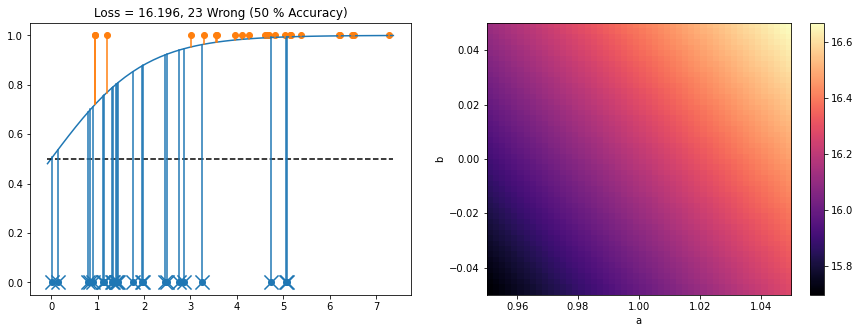

In [4]:
def get_logistic_loss(x1, x2, a, b):
    return np.sum(logistic(a*x1+b)**2) + np.sum((1-logistic(a*x2+b))**2)
        
def plot_logistic_neighborhood(x1, x2, amin, amax, bmin, bmax, res=50):
    """
    Plot a neighborhood of the logistic function
    evaluated on a set of points
    
    Parameters
    ----------
    x1: ndarray(N)
        The points that should be classified as 0
    x2: ndarray(M)
        The points that should be classified as 1
    amin, amax, bmin, bmax
        Neighborhood around which to display values
    res: int
        Resolution to search around (a, b)
    """
    aa = np.linspace(amin, amax, res)
    bb = np.linspace(bmin, bmax, res)
    aa, bb = np.meshgrid(aa, bb)
    I = np.zeros_like(aa)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            I[i, j] = get_logistic_loss(x1, x2, aa[i, j], bb[i, j])
    plt.imshow(I, cmap='magma', extent=(amin, amax, bmax, bmin), aspect='auto')
    plt.xlabel("a")
    plt.ylabel("b")
    plt.colorbar()
    plt.gca().invert_yaxis()
    
def plot_logistic_regression_predictions(x1, x2, a, b):
    plt.scatter(x1, np.zeros(x1.size))
    plt.scatter(x2, np.ones(x2.size))
    x = np.linspace(np.min(x1)-0.1, np.max(x2)+0.1)
    y = a*x + b
    plt.plot(x, logistic(y))
    plt.plot(x, 0.5*np.ones(x.size), c='k', linestyle='--')
    wrong = 0
    for x in x1:
        y = logistic(a*x + b)
        plt.plot([x, x], [0, y], c='C0')
        if y > 0.5:
            plt.scatter([x], [0], 200, c='C0', marker='x')
            wrong += 1
    for x in x2:
        y = logistic(a*x + b)
        plt.plot([x, x], [1, y], c='C1')
        if y < 0.5:
            plt.scatter([x], [1], 200, c='C1', marker='x')
            wrong += 1
    loss = get_logistic_loss(x1, x2, a, b)
    N = x1.size + x2.size
    plt.title("Loss = {:.3f}, {} Wrong ({} % Accuracy)".format(loss, wrong, int(100*(N-wrong)/N)))
    
n_steps += 1
a = 1
b = 0
losses.append(get_logistic_loss(x1, x2, a, b))
steps.append([a, b])


## TODO: Keep running this cell with different a's and b's


plt.figure(figsize=(15, 5))
plt.subplot(121)
plot_logistic_regression_predictions(x1, x2, a, b)
plt.subplot(122)
plot_logistic_neighborhood(x1, x2, a-0.05, a+0.05, b-0.05, b+0.05)

<ipython-input-4-87f420f5e572>:27: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  plt.imshow(I, cmap='magma', extent=(amin, amax, bmax, bmin), aspect='auto')
<ipython-input-4-87f420f5e572>:27: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  plt.imshow(I, cmap='magma', extent=(amin, amax, bmax, bmin), aspect='auto')


Text(0, 0.5, 'Loss')

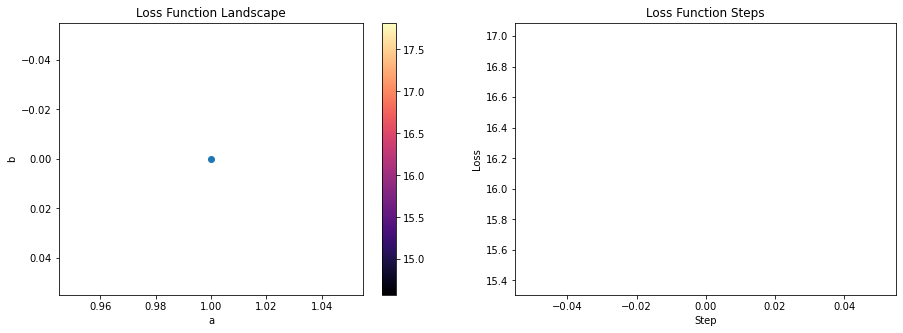

In [5]:
mins = np.min(np.array(steps), axis=0)
maxs = np.max(np.array(steps), axis=0)
dr = maxs-mins
plt.figure(figsize=(15, 5))
plt.subplot(121)
plot_logistic_neighborhood(x1, x2, mins[0]-dr[0]*0.1, maxs[0]+dr[0]*0.1, mins[1]-dr[1]*0.1, maxs[1]*dr[1]*0.1)
plt.plot(np.array(steps)[:, 0], np.array(steps)[:, 1])
plt.scatter(np.array(steps)[:, 0], np.array(steps)[:, 1])
plt.title("Loss Function Landscape")
plt.subplot(122)
plt.plot(losses)
plt.title("Loss Function Steps")
plt.xlabel("Step")
plt.ylabel("Loss")